
# SPACESHIP TITANIC DATASET SOLUTION

The Spaceship Titanic was an interstellar passenger liner launched by Kaggle in 2022. 
This is a variant of the Titanic dataset.

**Description**: With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants 
from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic 
collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a fate similar to its namesake 
from 1000 years ago. Though the ship stayed intact, almost half the passengers were transported to an alternate dimension!

**Task**: To help rescue crews retrieve lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

https://www.kaggle.com/competitions/spaceship-titanic

In [2]:
##Import necessary libraries

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np 
import operator
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from sklearn.metrics import average_precision_score, roc_curve, roc_auc_score


_Discuss best pratices in module importing_

**DATA COLLECTION**

In [44]:
#Loading Dataset into a dataframe

SST_Dataset = pd.read_csv(r"C:\Users\kehin\Documents\Spaceship_dataset.csv")

**DATA ANALYSIS**

In [4]:
SST_Dataset.head(5) ##Preview the top five rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
 SST_Dataset.tail(5) ##Preview the last five rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [8]:
SST_Dataset.shape ##Check how many rows and columns

(8693, 14)

In [9]:
print(SST_Dataset.columns.values) ##Print out the column names

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [10]:
SST_Dataset.info() ##Further exploration to understand the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
SST_Dataset.describe() ##Understand the value range of the numerical values

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
SST_Dataset.describe(include=['O']) ##Understand the categorical variable

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [13]:
cat_variable = ['HomePlanet','CryoSleep', 'Destination', 'VIP']
num_variable = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print("Unique categorical variable values are shown below... \n")

for cat in cat_variable:
    print(cat, "==> ", SST_Dataset[cat].unique())

Unique categorical variable values are shown below... 

HomePlanet ==>  ['Europa' 'Earth' 'Mars' nan]
CryoSleep ==>  [False True nan]
Destination ==>  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP ==>  [False True nan]


In [14]:
SST_Dataset.isnull().sum() ##Any missing value

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

_oh my! quite a lot of missing values. Let's visualise the dataset_

**DATA ANALYSIS**

<Axes: >

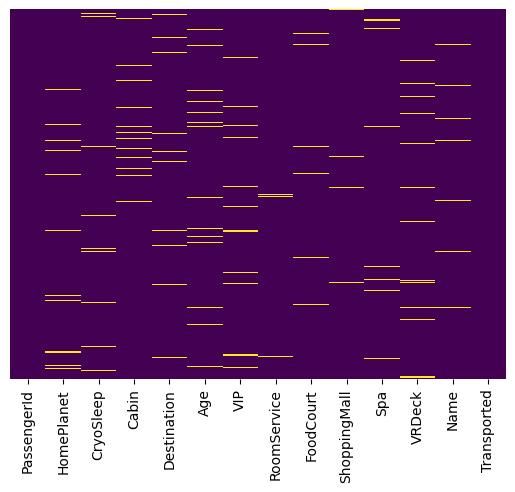

In [15]:
##Visualise missing values using seaborn library
sns.heatmap(SST_Dataset.isnull(),cmap='viridis',yticklabels=False,cbar=False)

<Axes: >

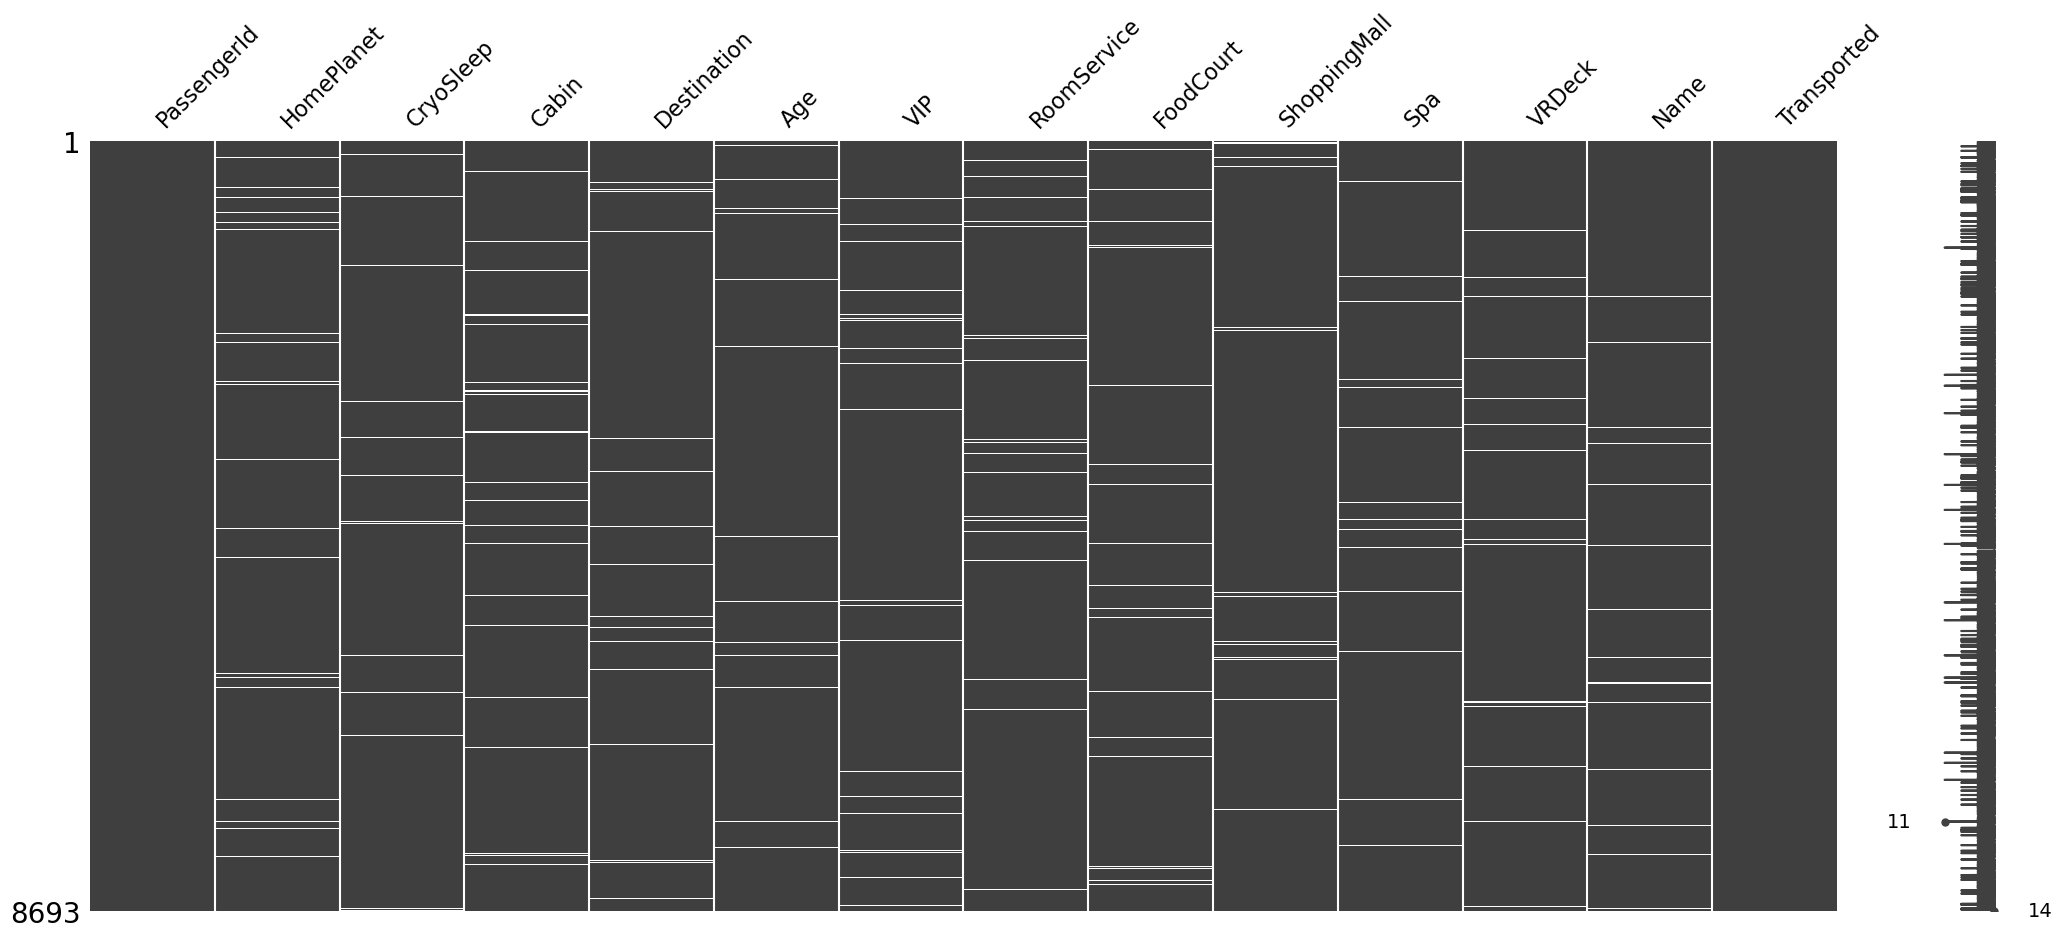

In [16]:
##Visualise missing values using missingno library
msno.matrix(SST_Dataset)

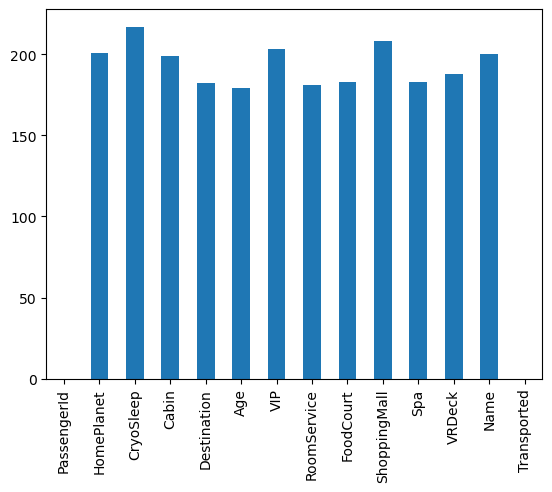

In [17]:
###Visualise frequency of missing values
SST_Dataset.isnull().sum().plot.bar()
plt.show()

_Visualising Outliers_

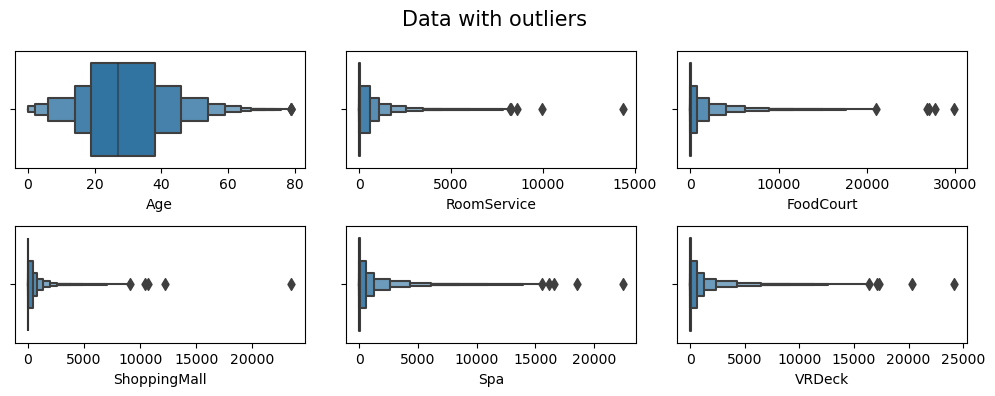

In [45]:
#Visualise Numerical variables
#num_variable = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig = plt.figure(figsize= (10,4))
plt.suptitle('Data with outliers',fontsize=15)
for i, col in enumerate(num_variable):
    
    ax=fig.add_subplot( 2, 3, i+1)
    
    sns.boxenplot(x=SST_Dataset[col],ax=ax)
fig.tight_layout()  
plt.show()

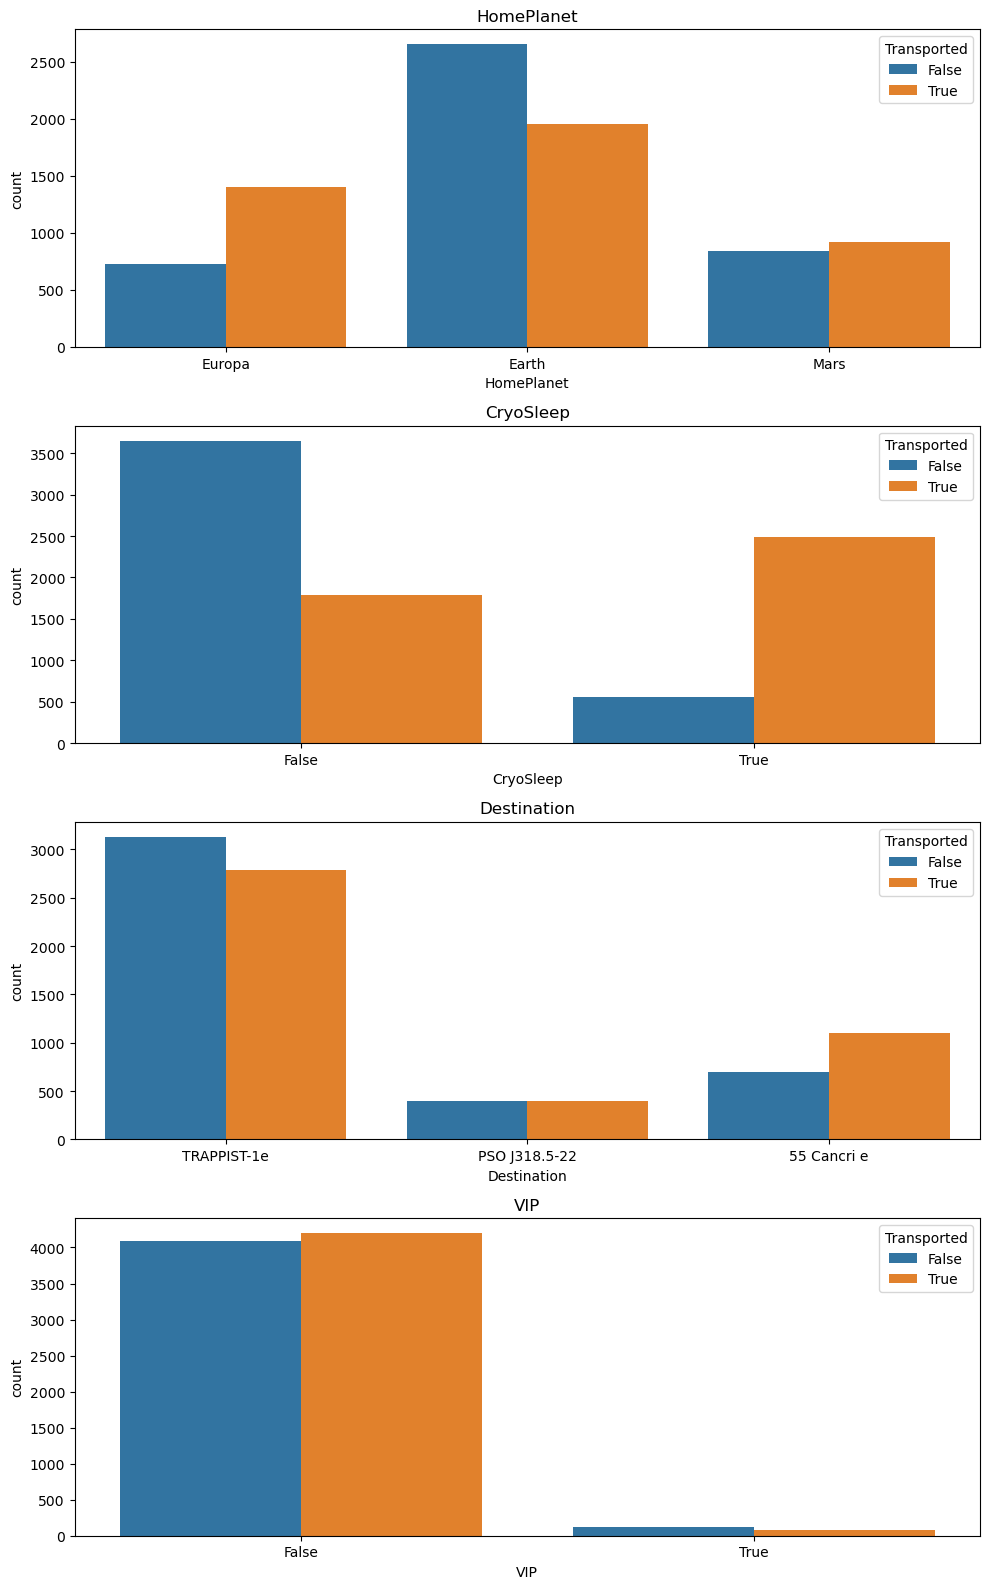

In [21]:
# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_variable):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=SST_Dataset, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

**DATA PREPROCESSING**

_Handling Outliers_

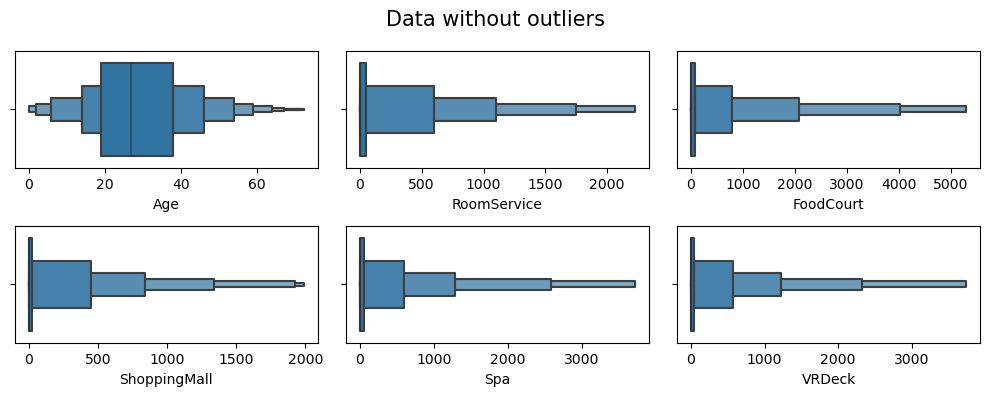

In [22]:
##Z-Score method
#https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/
for num in num_variable:
    upper_limit = SST_Dataset[num].mean() + 3*SST_Dataset[num].std()
    lower_limit = SST_Dataset[num].mean() - 3*SST_Dataset[num].std()

    SST_Dataset[num] = np.where(
        SST_Dataset[num]>upper_limit,
        upper_limit,
        np.where(
            SST_Dataset[num]<lower_limit,
            lower_limit,
            SST_Dataset[num]
        )
    )

fig = plt.figure(figsize= (10,4))
plt.suptitle('Data without outliers',fontsize=15)
for i, col in enumerate(num_variable):
    
    ax=fig.add_subplot( 2, 3, i+1)
    
    sns.boxenplot(x=SST_Dataset[col],ax=ax)
fig.tight_layout()  
plt.show()

_Further Prepocessing_

In [23]:
SST_Dataset.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.000000,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.000000,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,3721.255382,49.0,Altark Susent,False


In [46]:
#Separating PassengerId ==> gggg_ddd  = gggg and ddd
#Separating Cabin ==> Deck/Num/Side = Deck, Num, Side
SST_Dataset[['P_Group', 'P_Num']] = SST_Dataset.PassengerId.str.split(pat='_', n=1, expand=True) 
SST_Dataset[['C_Deck', 'C_Num', 'C_Side']] = SST_Dataset.Cabin.str.split(pat='/', n=-1, expand=True) 
SST_Dataset = SST_Dataset.drop(['PassengerId', 'Cabin', 'Name'], axis=1) #dropping unnecessary columns

SST_Dataset.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_Group,P_Num,C_Deck,C_Num,C_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S


_Fill in missing value_

In [47]:
#Function to Replace missing Categorical values with the most prevalent category
def fill_Categorical_Value(Dataset): 
    Categorical = ['P_Group','P_Num', 'HomePlanet', 'CryoSleep', 'C_Deck', 'C_Num', 
                   'C_Side','Destination', 'VIP']
    Unique_Value = {}
    for i in Categorical:
        Unique_Value = Dataset[i].value_counts().sort_values(ascending=False)
        Replace_Value = max(Unique_Value.items(), key=operator.itemgetter(1))[0]
        Dataset[i] = Dataset[i].fillna(Replace_Value)

fill_Categorical_Value(SST_Dataset) #Calling the above function to filling missing values in the dataset
#Dataset_Train.isna().sum() #Missing values have been treated for categorical features

In [48]:
#Function to Replace missing numerical values with the mean of each feature
def fill_numerical_value(dataset):
    Numerical = ['Age','RoomService', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa',  'VRDeck']
    for i in Numerical:
        Replace_Value = dataset[i].mean()
        dataset[i] = dataset[i].fillna(Replace_Value)

fill_numerical_value(SST_Dataset) #Calling the above function to filling missing values in the dataset
#Dataset_Train.isna().sum() #Missing values have been treated for numerical features

_Feature Encoding_

In [49]:
#Pre-processing categorical values using Label encoder
#Function to convert categorical values into numerical values using label encoding
def Categorical_PreProcessing(Dataset):
    labelencoder = LabelEncoder()
    Catergory_num = ['P_Group', 'P_Num', 'C_Num']
    Catergory_str = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','C_Deck', 'C_Side', 'Transported']
    for i in Catergory_num:
        Dataset[i] = Dataset[i].astype(float)
    for j in Catergory_str:
        Dataset[j] = labelencoder.fit_transform(Dataset[j])
        
Categorical_PreProcessing(SST_Dataset) #Calling the above function for the train and test data
SST_Dataset.tail(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_Group,P_Num,C_Deck,C_Num,C_Side
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,9276.0,1.0,0,98.0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,9278.0,1.0,6,1499.0,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,9279.0,1.0,6,1500.0,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,9280.0,1.0,4,608.0,1
8692,1,0,2,44.0,0,126.0,4688.0,0.0,0.0,12.0,1,9280.0,2.0,4,608.0,1


_Feature Scaling_

In [50]:
#Pre-processing Numerical values using Scaler module
sc = StandardScaler()
ms = MinMaxScaler() 
Age_label = ['Age']
Numerical_label = ['RoomService', 'RoomService', 'FoodCourt','ShoppingMall', 'Spa',  'VRDeck']
SST_Dataset[Numerical_label] = sc.fit_transform(SST_Dataset[Numerical_label])
SST_Dataset[Age_label] = ms.fit_transform(SST_Dataset[Age_label])
SST_Dataset.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_Group,P_Num,C_Deck,C_Num,C_Side
0,1,0,2,0.493671,0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,0,1.0,1.0,1,0.0,0
1,0,0,2,0.303797,0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,1,2.0,1.0,5,0.0,1
2,1,0,2,0.734177,1,-0.275409,1.955616,-0.290817,5.694289,-0.225782,0,3.0,1.0,0,0.0,1
3,1,0,2,0.417722,0,-0.340590,0.517406,0.330225,2.683471,-0.098708,0,3.0,2.0,0,0.0,1
4,0,0,2,0.202532,0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,1,4.0,1.0,5,1.0,1


_Data Splitting_

In [51]:
# Splitting the data into train and validation set 
X = SST_Dataset.drop('Transported', axis = 1)
y = SST_Dataset.Transported
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

**MODEL TRAINING**

_Gradient Boosting Classifier_

In [52]:
#MODEL SELECTION : Gradient Boosting Classifier
Classifier_GBC = GradientBoostingClassifier()
Classifier_GBC.fit(XTrain, yTrain)

#Prediction with Model
G_yPred = Classifier_GBC.predict(XTest)


G_APS = round(average_precision_score(yTest, G_yPred),2)


_Random Forest Classifier_

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(XTrain, yTrain)
R_yPred = random_forest.predict(XTest)

R_APS = round(average_precision_score(yTest, R_yPred),2)
R_APS

0.76

_Support Victor Machine Classifier_

In [54]:
# Support Vector Machines
L_svc = LinearSVC()
L_svc.fit(XTrain, yTrain)
L_yPred = L_svc.predict(XTest)
L_APS = round(average_precision_score(yTest, L_yPred),2)
L_APS

C:\Users\kehin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.53

**MODEL EVALUATION**

In [55]:
models = pd.DataFrame({
    'Model': ['Gradient Boosting Classifier', 'Random Forest', 'Support Vector Machines'],
    'Score': [G_APS, R_APS, L_APS]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.76
0,Gradient Boosting Classifier,0.74
2,Support Vector Machines,0.53


In [41]:
#Metrics for evaluation 
print("The accuracy of dataset is: ",round(accuracy_score(yTest, R_yPred), 2 ) * 100, "%", '\n')
print("Confusion Matrix:\n", confusion_matrix(yTest, R_yPred), '\n')
print("Classification Report:\n", classification_report(yTest, R_yPred))
print("Average prediction score is :", (round(R_APS, 2)*100), "%")

The accuracy of dataset is:  79.0 % 

Confusion Matrix:
 [[693 156]
 [203 687]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       849
           1       0.81      0.77      0.79       890

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Average prediction score is : 75.0 %


<Axes: title={'center': 'Confusion Matrix for GradientBoostingClassifier'}, xlabel='Predicted label', ylabel='True label'>

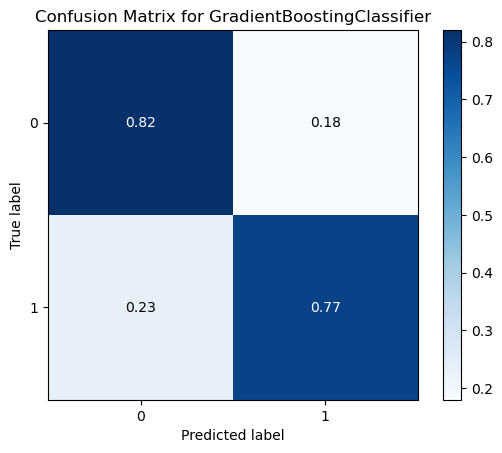

In [42]:
skplt.metrics.plot_confusion_matrix(yTest, R_yPred, normalize=True, 
                                    title = 'Confusion Matrix for GradientBoostingClassifier')

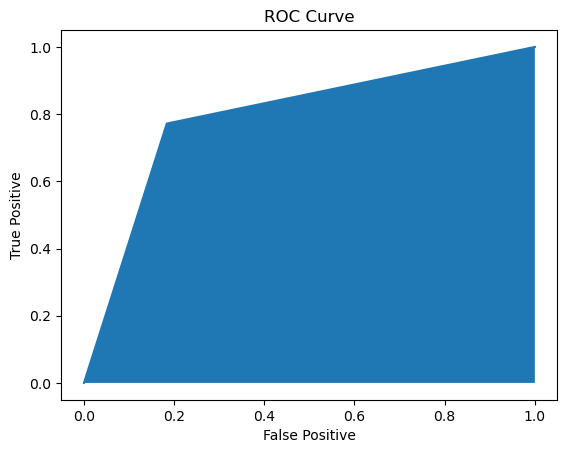

The area under the ROC curve is: 79.0 %


In [43]:
#Show the ROC curve
FP, TP,_ = roc_curve(yTest, R_yPred)

plt.plot(FP,TP)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('ROC Curve')
plt.fill_between(FP, TP)
plt.show()

AUC = roc_auc_score(yTest, G_yPred)
print("The area under the ROC curve is:", round(AUC, 2)*100, "%")